# Illustration convergence de l'estimateur du maximum de vraisemblance

In [3]:
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats as st

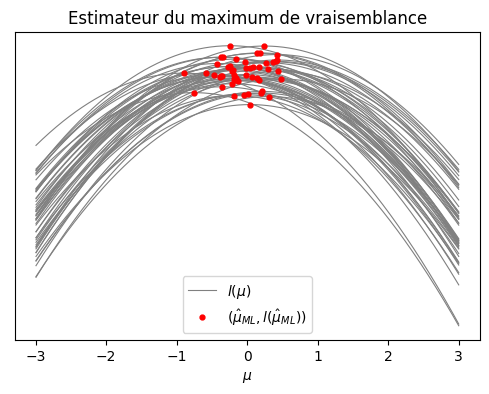

In [4]:
fig, axs = plt.subplots(1,1,figsize = (6,4))

np.random.seed(seed=959)

x = np.linspace(-3,3,1000)[1:]
mu = 0
sigma = 2

m = 50
n = 40

X = st.norm.rvs(size=(n,m),scale=sigma,loc = mu)

# fonction permettant de calculer la log-vraisemblance de chacun des m échantillons pour le paramètre theta
def log_vraisemblance(theta,i):
    return [np.sum(st.norm.logpdf(X[:,i],loc = theta_, scale = sigma)) for theta_ in theta]

# Plot des fonctions de log-vraisemblance pour chacun des échantillons
axs.plot(x,log_vraisemblance(x,0),"grey",linewidth= 0.8,label=r"$l(\mu)$")
for i in range(1,m):    
    axs.plot(x,log_vraisemblance(x,i),"grey",linewidth= 0.8)

# Plot de l'estimateur du maximum de vraisemblance pour chaque échantillons
lambda_ML = X[:,0].mean()
axs.plot(lambda_ML,np.sum(st.norm.logpdf(X[:,0],loc = lambda_ML, scale = sigma)),"ro",markersize =3.5,
             label = r"$(\hat{\mu}_{ML},l(\hat{\mu}_{ML}))$")
for i in range(1,m):
    lambda_ML = X[:,i].mean()
    axs.plot(lambda_ML,np.sum(st.norm.logpdf(X[:,i],loc = lambda_ML, scale = sigma)),"ro",markersize =3.5)


axs.get_yaxis().set_visible(False)
axs.set_title(r"Estimateur du maximum de vraisemblance")
axs.set_xlabel(r"$\mu$")
axs.legend(loc='lower center')
plt.show()

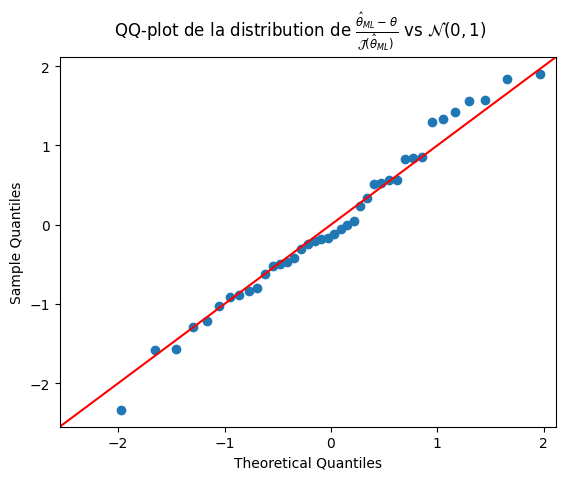

In [5]:
import statsmodels.api as sm

fig = sm.qqplot((X.mean(axis=1)-X.mean(axis=1).mean())/sigma**2*n, fit=True, line="45")
fig.suptitle(r"QQ-plot de la distribution de $\frac{\hat{\theta}_{ML}-\theta}{\mathcal{J}(\hat{\theta}_{ML})}$ vs $\mathcal{N}(0,1)$")
plt.show()

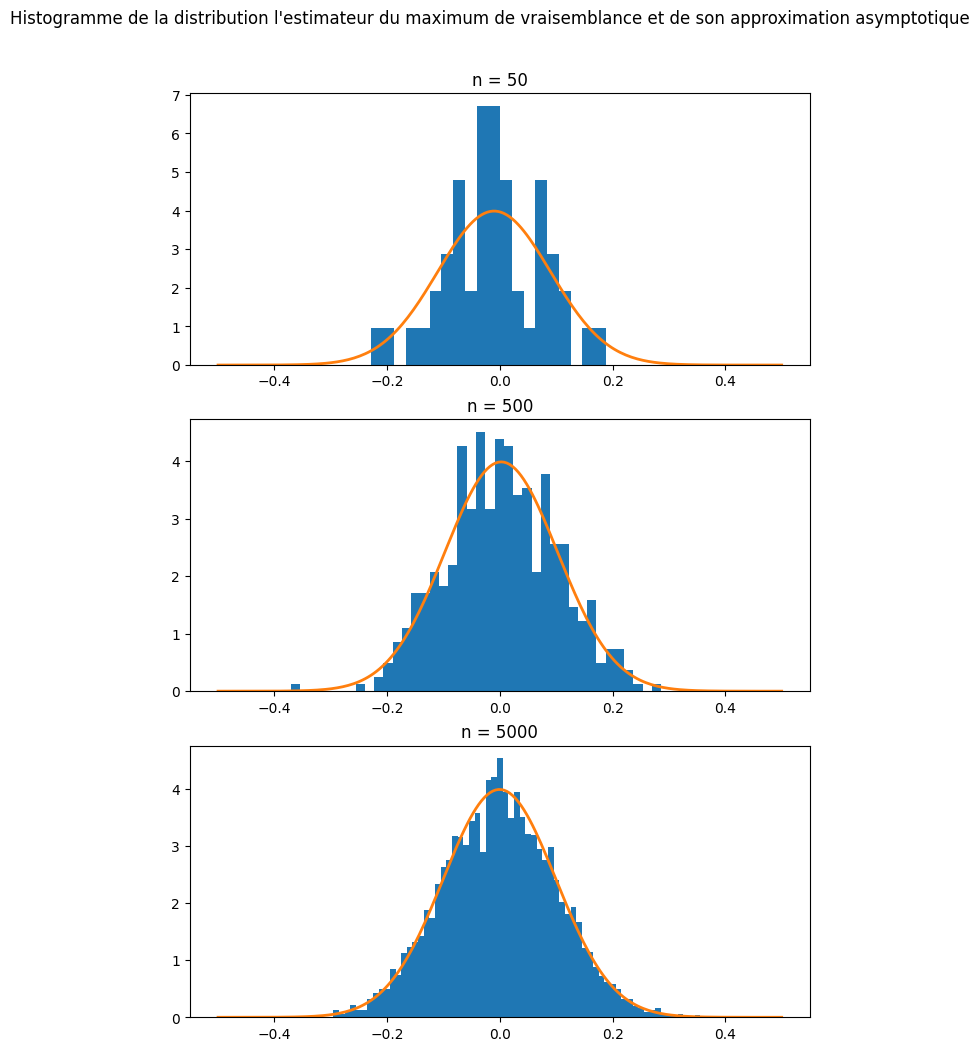

In [6]:
fig, ax = plt.subplots(3,1,figsize=(8,12))

n = 50
m = 400

np.random.seed(seed=959)

X = st.norm.rvs(size=(n,m),scale=sigma,loc = mu)
x = np.linspace(-0.5,0.5,200)

# Plot de la distribution asymptotique du maximum de vraisemblance pour un nombre croissant d'échantillon
ax[0].hist(X.mean(axis=1),bins=20,density = True)
ax[0].plot(x,st.norm.pdf(x,loc =X.mean(axis=1).mean(),scale = sigma/np.sqrt(m)),linewidth=2)
ax[0].set_title("n = 50")

n = 500
X = st.norm.rvs(size=(n,m),scale=sigma,loc = mu)
ax[1].hist(X.mean(axis=1),bins=40,density = True)
ax[1].plot(x,st.norm.pdf(x,loc =X.mean(axis=1).mean(),scale = sigma/np.sqrt(m)),linewidth=2)
ax[1].set_title("n = 500")

n = 5000
X = st.norm.rvs(size=(n,m),scale=sigma,loc = mu)
ax[2].hist(X.mean(axis=1),bins=75,density = True)
ax[2].plot(x,st.norm.pdf(x,loc =X.mean(axis=1).mean(),scale = sigma/np.sqrt(m)),linewidth=2)
ax[2].set_title("n = 5000")

fig.suptitle("Histogramme de la distribution l'estimateur du maximum de vraisemblance et de son approximation asymptotique",y=0.95)
plt.show()